In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('data/Train_Data.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [4]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
dtype: int64

In [5]:
len(df)

2000

In [44]:
for i in df.columns:
    print(i,":", df[i].value_counts())
    print("-"*40)
    print('-'*40)

battery_power : 1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: battery_power, Length: 1094, dtype: int64
----------------------------------------
----------------------------------------
blue : 0    1010
1     990
Name: blue, dtype: int64
----------------------------------------
----------------------------------------
clock_speed : 0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64
----------------------------------------
----------------------------------------
dual_sim : 1    1019
0     981
Name: dual_sim, dtype: int64
----------------------------------------
----------------------------------------
fc : 0     474
1     245
2     189
3     170
5     139

In [45]:
2000-(df.four_g ==df.three_g).sum()

480

Remove four_g column since, if a phoen is 4g its also 3g but not vice versa. So, having 4g column is not providig any info. The only place 4g and 3g have different values is if its 3g but not 4g. 

In [46]:
2000-(df.blue ==df.three_g).sum()

1031

In [6]:
df2 = pd.read_csv('data/Traindata_classlabels.csv')
df2.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [7]:
df3 = df.copy()
df3['price_range'] = df2

In [49]:
df3

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


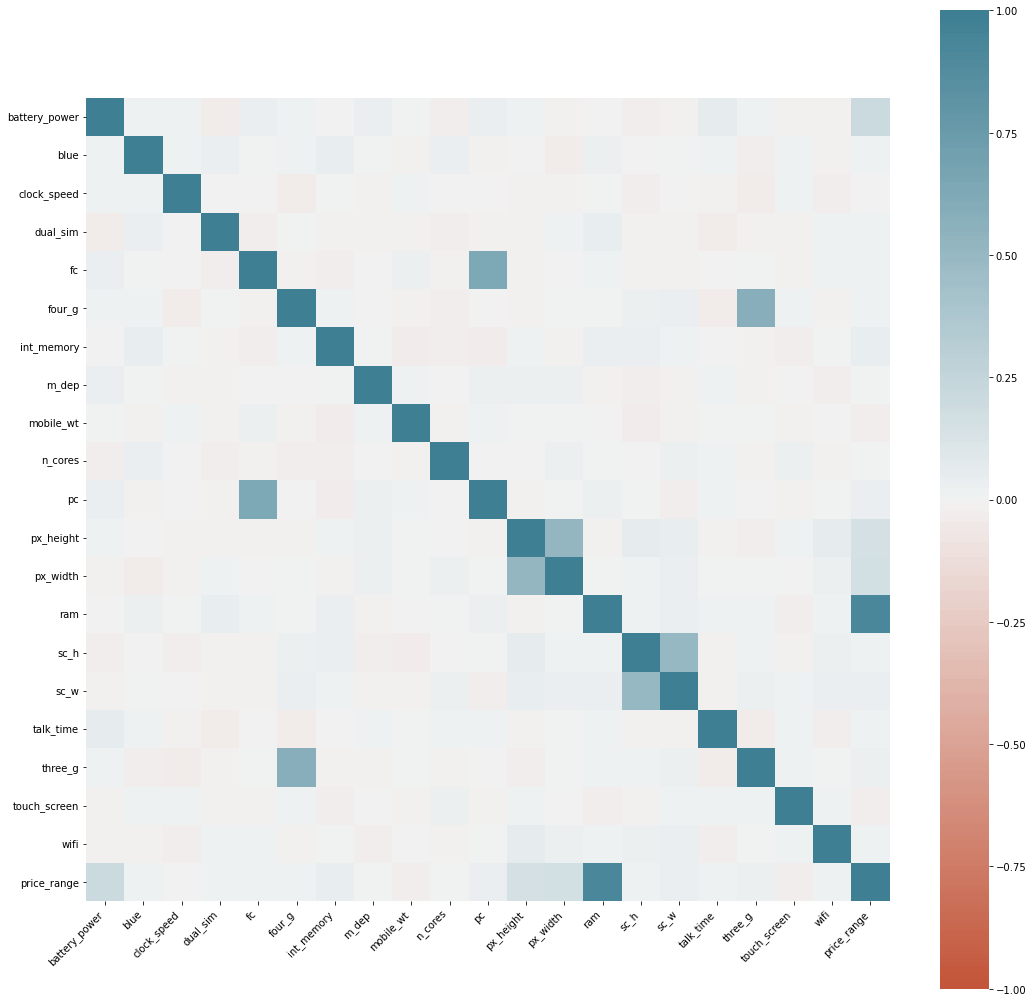

In [8]:
corr = df3.corr()
plt.figure(figsize = (18,18))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [51]:
d = 0.01
col = []
for idx,i in enumerate(corr['price_range']):
    if i <= d and i >= -d:
        col.append(corr.columns[idx])
        print(corr.columns[idx])

clock_speed
m_dep
n_cores


In [52]:
corr['price_range']
    

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [243]:
# df4 = df.drop(col,axis = 1)
df4 = df.copy()
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [184]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [186]:
X_train, X_test, y_train, y_test = train_test_split(df4,df2,random_state=5,shuffle=True,test_size=0.2)
# m = KNeighborsClassifier(n_neighbors=15,metric='cityblock',weights='distance',n_jobs=-1)
# m.fit(X_train,y_train.values.ravel())

modelKNN = KNeighborsClassifier()
params = {
    "n_neighbors": np.arange(2,25 ,1),
    "metric": [
        "cityblock",
        "cosine",
        "euclidean",
        "l1",
        "l2",
        "manhattan",
        "nan_euclidean",
    ],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
#     'p' :np.arange(2,10,1),
#     'leaf_size' : np.arange(1,12,1)
}
clfKNN = GridSearchCV(modelKNN, params, cv=10, n_jobs=-1,scoring = 'accuracy')
clfKNN.fit(X_train, y_train.values.ravel())

pred = clfKNN.predict(X_test)
print(classification_report(y_test,pred))
clfKNN.best_params_

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       103
           1       0.90      0.93      0.91        92
           2       0.90      0.90      0.90       101
           3       0.98      0.93      0.96       104

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



{'algorithm': 'auto',
 'metric': 'cityblock',
 'n_neighbors': 18,
 'weights': 'distance'}

In [187]:
# pred = m.predict(X_test)
# print(classification_report(y_test,pred))

In [244]:
# df4.drop('four_g',axis = 1,inplace=True)
df4['sc_diag'] = np.sqrt(df['sc_h']**2 + df['sc_w']**2)
df4['sc_area'] = df['sc_h'] * df['sc_w']
df4['px_diag'] = np.sqrt(df['px_height']**2 + df['px_width']**2)
df4['px_area'] = df['px_width'] * df['px_height']
df4['talk_per_mAh'] = df['talk_time']/ df['battery_power']
df4['connectivity'] = df['three_g'] + df['four_g'] + df['blue'] + df['wifi'] + df['dual_sim']
df4['ram_per_core'] = df['ram'] / df['n_cores']
df4['weight_by_thickness'] = df['mobile_wt'] / df['m_dep']
df4['total_clock_speed'] = df['clock_speed'] * df['n_cores']
df4['fc_res'] = [1 if df['fc'][i] >=8 else 0 for i in range(len(df)) ]
df4['pc_res'] = [1 if df['pc'][i] >=8 else 0 for i in range(len(df)) ]
df4['sc_res'] = [1 if df4['px_area'][i]  >= 921600 else 0 for i in range(len(df4)) ]
df4['DPIx'] = df['px_width'] / (df['sc_w']*0.394 + 1)
df4['DPIy'] = df['px_height'] / (df['sc_h']*0.394 + 1)
df4['DPI'] = (df['px_width'] * df['px_height']) / (df4['sc_area'] * (0.394)**2 + 1)
df4

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,connectivity,ram_per_core,weight_by_thickness,total_clock_speed,fc_res,pc_res,sc_res,DPIx,DPIy,DPI
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1,1274.500000,313.333333,4.4,0,0,0,201.170836,4.399472,1402.614577
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,4,877.000000,194.285714,1.5,0,0,1,911.090742,117.563003,201764.353088
2,563,1,0.5,1,2,1,41,0.9,145,5,...,4,520.600000,161.111111,2.5,0,0,1,959.731544,236.782902,490875.142010
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2,461.500000,163.750000,15.0,0,1,1,430.154143,166.484118,104061.061586
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,3,705.500000,235.000000,2.4,1,1,1,677.852349,290.944123,420261.233788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,4,111.333333,132.500000,3.0,0,1,1,733.695652,199.607971,254575.700552
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,4,508.000000,935.000000,10.4,0,0,1,397.773279,171.541057,99467.746111
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,3,382.125000,154.285714,7.2,0,0,1,1170.731707,190.937088,590948.152870
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,3,173.800000,1450.000000,4.5,0,0,0,135.627530,41.522491,7778.186251


In [222]:
X_train, X_test, y_train, y_test = train_test_split(df4,df2,random_state=5,shuffle=True,test_size=0.2)
modelKNN = KNeighborsClassifier()
params = {
    "n_neighbors": np.arange(2,25 ,1),
    "metric": [
        "cityblock",
        "cosine",
        "euclidean",
        "l1",
        "l2",
        "manhattan",
        "nan_euclidean",
    ],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
#     'p' :np.arange(2,10,1),
#     'leaf_size' : np.arange(1,12,1)
}
clfKNN = GridSearchCV(modelKNN, params, cv=10, n_jobs=-1,scoring = 'accuracy')
clfKNN.fit(X_train, y_train.values.ravel())

pred = clfKNN.predict(X_test)
print(classification_report(y_test,pred))
clfKNN.best_params_

              precision    recall  f1-score   support

           0       0.67      0.50      0.57       103
           1       0.30      0.32      0.31        92
           2       0.37      0.41      0.38       101
           3       0.42      0.46      0.44       104

    accuracy                           0.42       400
   macro avg       0.44      0.42      0.43       400
weighted avg       0.44      0.42      0.43       400



{'algorithm': 'auto',
 'metric': 'cosine',
 'n_neighbors': 15,
 'weights': 'distance'}

In [ ]:
df4['price_range'] = df2 
corr = df4.corr()
# plt.figure(figsize = (18,18))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
d = 0.03
col = []
for idx,i in enumerate(corr['price_range']):
    if i <= d and i >= -d:
        col.append(corr.columns[idx])
        print(corr.columns[idx])
df4 = df4.drop(col,axis = 1)
df4 = df4.drop('price_range',axis = 1)
df4

In [246]:
X_train, X_test, y_train, y_test = train_test_split(df4,df2,random_state=5,shuffle=True,test_size=0.2)
# m = KNeighborsClassifier(n_neighbors=5,metric='cityblock',weights='distance',n_jobs=12)
# m.fit(X_train,y_train.values.ravel())

# pred = m.predict(X_test)
# print(classification_report(y_test,pred))

# X_train, X_test, y_train, y_test = train_test_split(df4,df2,random_state=5,shuffle=True,test_size=0.2)
modelKNN = KNeighborsClassifier()
params = {
    "n_neighbors": np.arange(2,25 ,1),
    "metric": [
        "cityblock",
        "cosine",
        "euclidean",
        "l1",
        "l2",
        "manhattan",
        "nan_euclidean",
    ],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
#     'p' :np.arange(2,10,1),
#     'leaf_size' : np.arange(1,12,1)
}
clfKNN = GridSearchCV(modelKNN, params, cv=10, n_jobs=-1,scoring = 'accuracy')
clfKNN.fit(X_train, y_train.values.ravel())

pred = clfKNN.predict(X_test)
print(classification_report(y_test,pred))
clfKNN.best_params_

              precision    recall  f1-score   support

           0       0.71      0.52      0.60       103
           1       0.30      0.32      0.31        92
           2       0.38      0.42      0.40       101
           3       0.42      0.47      0.45       104

    accuracy                           0.43       400
   macro avg       0.45      0.43      0.44       400
weighted avg       0.46      0.43      0.44       400



{'algorithm': 'auto',
 'metric': 'cosine',
 'n_neighbors': 18,
 'weights': 'distance'}

In [225]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [247]:
scalar = StandardScaler()
X_tranform = scalar.fit_transform(df4)
X = pd.DataFrame(X_tranform,columns=df4.columns)
X

,battery_power,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_w,touch_screen,sc_diag,sc_area,px_diag,px_area,talk_per_mAh,connectivity,ram_per_core,sc_res,DPIx,DPIy,DPI
0,-0.902597,-1.380644,1.349249,-1.305750,-1.408949,-1.146784,0.391703,0.283103,-1.006018,-0.502325,-0.224686,-1.303203,-1.073033,1.827141,-1.500495,0.748869,-0.769647,-0.858143,-1.251978,-0.515671
1,-0.495139,1.155024,-0.120059,-0.645989,0.585778,1.704465,0.467317,-0.635317,0.994018,0.642921,-0.380926,1.400292,1.077541,-0.496160,1.007995,0.216888,1.299297,1.054376,-0.021400,0.028447
2,-1.537686,0.493546,0.134244,-0.645989,1.392684,1.074968,0.441498,-0.864922,0.994018,-0.545590,-0.758506,1.298792,1.521355,0.854072,1.007995,-0.260087,1.299297,1.185414,1.275036,0.813580
3,-1.419319,-1.215274,-0.261339,-0.151168,1.286750,1.236971,0.594569,0.512708,-1.006018,0.765218,0.621614,1.355536,1.526741,1.135127,-0.664332,-0.339182,1.299297,-0.241264,0.510584,-0.236884
4,1.325906,0.658915,0.021220,0.673534,1.268718,-0.091452,-0.657666,-0.864922,0.994018,-1.118929,-0.836626,0.504640,0.673657,-0.291888,0.171832,-0.012633,1.299297,0.426033,1.864003,0.621815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,-1.656260,-0.967737,0.673534,1.300273,1.477661,-1.342799,-0.405712,0.994018,-0.072492,-0.367906,1.525884,1.692859,2.028890,1.007995,-0.807815,1.299297,0.576475,0.870783,0.171866
1996,1.653694,0.383299,1.320993,-1.140810,0.608317,1.651235,-0.085031,0.971917,0.994018,0.174615,0.387254,1.368657,1.076137,-0.305900,1.007995,-0.276950,1.299297,-0.328498,0.565575,-0.249358
1997,1.530773,0.217930,-0.911225,-1.140810,0.502383,0.880565,0.860139,-1.094526,0.994018,-0.960814,-0.927766,0.764515,0.616374,-1.123168,0.171832,-0.445410,1.299297,1.753846,0.776493,1.085346
1998,0.622527,0.769162,0.134244,-0.810929,-0.696707,-1.345816,-1.157454,0.971917,0.994018,1.293338,1.298653,-1.315952,-0.819885,0.348328,0.171832,-0.724215,-0.769647,-1.034716,-0.848290,-0.498357


In [248]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif = pd.DataFrame()
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
d = 5
col = []
for idx,i in enumerate(vif):
    if i >= d:
        col.append(X.columns[idx])
        print(X.columns[idx])
X  = X.drop(col,axis = 1)

px_height
px_width
sc_w
sc_diag
sc_area
px_diag
px_area
DPIx
DPIy


In [249]:
X

,battery_power,int_memory,mobile_wt,pc,ram,touch_screen,talk_per_mAh,connectivity,ram_per_core,sc_res,DPI
0,-0.902597,-1.380644,1.349249,-1.305750,0.391703,-1.006018,1.827141,-1.500495,0.748869,-0.769647,-0.515671
1,-0.495139,1.155024,-0.120059,-0.645989,0.467317,0.994018,-0.496160,1.007995,0.216888,1.299297,0.028447
2,-1.537686,0.493546,0.134244,-0.645989,0.441498,0.994018,0.854072,1.007995,-0.260087,1.299297,0.813580
3,-1.419319,-1.215274,-0.261339,-0.151168,0.594569,-1.006018,1.135127,-0.664332,-0.339182,1.299297,-0.236884
4,1.325906,0.658915,0.021220,0.673534,-0.657666,0.994018,-0.291888,0.171832,-0.012633,1.299297,0.621815
...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,-1.656260,-0.967737,0.673534,-1.342799,0.994018,2.028890,1.007995,-0.807815,1.299297,0.171866
1996,1.653694,0.383299,1.320993,-1.140810,-0.085031,0.994018,-0.305900,1.007995,-0.276950,1.299297,-0.249358
1997,1.530773,0.217930,-0.911225,-1.140810,0.860139,0.994018,-1.123168,0.171832,-0.445410,1.299297,1.085346
1998,0.622527,0.769162,0.134244,-0.810929,-1.157454,0.994018,0.348328,0.171832,-0.724215,-0.769647,-0.498357


In [250]:
X_train, X_test, y_train, y_test = train_test_split(X,df2,random_state=5,shuffle=True,test_size=0.2)
m = KNeighborsClassifier(n_neighbors=5,metric='cityblock',weights='distance',n_jobs=12)
m.fit(X_train,y_train.values.ravel())

pred = m.predict(X_test)
print(classification_report(y_test,pred))


modelKNN = KNeighborsClassifier()
params = {
    "n_neighbors": np.arange(2,25 ,1),
    "metric": [
        "cityblock",
        "cosine",
        "euclidean",
        "l1",
        "l2",
        "manhattan",
        "nan_euclidean",
    ],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
#     'p' :np.arange(2,10,1),
#     'leaf_size' : np.arange(1,12,1)
}
clfKNN = GridSearchCV(modelKNN, params, cv=10, n_jobs=-1,scoring = 'accuracy')
clfKNN.fit(X_train, y_train.values.ravel())

pred = clfKNN.predict(X_test)
print(classification_report(y_test,pred))
clfKNN.best_params_

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       103
           1       0.62      0.65      0.63        92
           2       0.61      0.58      0.60       101
           3       0.82      0.80      0.81       104

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       103
           1       0.69      0.63      0.66        92
           2       0.68      0.72      0.70       101
           3       0.90      0.84      0.87       104

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



{'algorithm': 'auto',
 'metric': 'cityblock',
 'n_neighbors': 24,
 'weights': 'distance'}

In [253]:
pca = PCA()
principalComp = pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance')

n_components=10
pca = PCA(n_components=n_components)
new_data = pca.fit_transform(X)
X_pca = pd.DataFrame(new_data,columns = [f'column {i}' for i in range(n_components)])
X_pca

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,df2,random_state=5,shuffle=True,test_size=0.2)
# m = KNeighborsClassifier(n_neighbors=10,metric='cityblock',weights='distance',n_jobs=12)
# m.fit(X_train,y_train.values.ravel())

# pred = m.predict(X_test)
# print(classification_report(y_test,pred))

modelKNN = KNeighborsClassifier()
params = {
    "n_neighbors": np.arange(2,25 ,1),
    "metric": [
        "cityblock",
        "cosine",
        "euclidean",
        "l1",
        "l2",
        "manhattan",
        "nan_euclidean",
    ],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
#     'p' :np.arange(2,10,1),
#     'leaf_size' : np.arange(1,12,1)
}
clfKNN = GridSearchCV(modelKNN, params, cv=10, n_jobs=-1,scoring = 'accuracy')
clfKNN.fit(X_train, y_train.values.ravel())

pred = clfKNN.predict(X_test)
print(classification_report(y_test,pred))
clfKNN.best_params_

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       103
           1       0.64      0.60      0.62        92
           2       0.63      0.68      0.65       101
           3       0.87      0.81      0.84       104

    accuracy                           0.75       400
   macro avg       0.75      0.74      0.74       400
weighted avg       0.75      0.75      0.75       400



{'algorithm': 'auto',
 'metric': 'cityblock',
 'n_neighbors': 21,
 'weights': 'distance'}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,df2,random_state=5,shuffle=True,test_size=0.2)
modelKNN = KNeighborsClassifier()
params = {
    "n_neighbors": np.arange(2,25 ,1),
    "metric": [
        "cityblock",
        "cosine",
        "euclidean",
        "l1",
        "l2",
        "manhattan",
        "nan_euclidean",
    ],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
#     'p' :np.arange(2,10,1),
#     'leaf_size' : np.arange(1,12,1)
}
clfKNN = GridSearchCV(modelKNN, params, cv=10, n_jobs=-1,scoring = 'f1_macro')
clfKNN.fit(X_train, y_train.values.ravel())

pred = clfKNN.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       103
           1       0.62      0.58      0.60        92
           2       0.56      0.54      0.55       101
           3       0.75      0.81      0.78       104

    accuracy                           0.71       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.70      0.71      0.70       400

